In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt



fonction jouer : 


In [2]:
def jouer(liste_Machines, action):
    n = random.uniform(0, 1)
    return 1 if n <= liste_Machines[action] else 0




In [3]:
def algo_aleatoire(liste_mu, liste_tirage):
    return random.randint(0, len(liste_mu)-1)

    

In [4]:
def algo_greedy(liste_mu, liste_tirage, k):
    if k >0:
        return random.randint(0,len(liste_mu)-1)
    else:
        return np.argmax(liste_mu)
    
    

In [5]:
def algo_epsilon_greedy(liste_mu, liste_tirage,epsilon, k=0):
    if k> 0:
        return random.randint(0,len(liste_mu)-1)
    else:
        e = random.uniform(0, 1)
        if e <= epsilon:
            return random.randint(0,len(liste_mu)-1)
        else:
            return np.argmax(liste_mu)

In [6]:
def UCB(liste_mu, liste_tirage, t, facteur):
    liste = liste_mu +facteur* np.sqrt(2*math.log(t)/liste_tirage)
    return np.argmax(liste)

In [81]:





N = 100
Levier = np.random.poisson(1, 100)
maxi, mini = np.max(Levier), np.min(Levier)
m = maxi if abs(maxi) >= abs(mini) else abs(mini)
Levier = Levier/ m

Levier


array([0.2, 0.2, 0.2, 0. , 0. , 0.2, 0.2, 0.4, 0.6, 0.4, 0.2, 0. , 0. ,
       0.2, 0. , 0. , 0. , 0.2, 0.2, 0. , 0. , 0.2, 0. , 0.4, 0.4, 0. ,
       0.2, 0. , 0.2, 0.4, 0.6, 0.2, 0. , 0. , 0. , 0. , 0.4, 0. , 1. ,
       0.6, 0. , 0. , 0. , 0. , 0.4, 0. , 0.4, 0.2, 0.6, 0. , 0.2, 0. ,
       0. , 0. , 0. , 0. , 0.2, 0. , 0.4, 0.6, 0.2, 0.2, 0.2, 0. , 0.2,
       0.2, 0. , 0.4, 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.4, 0. , 0.6, 0.2,
       0.2, 0.4, 0.4, 0. , 0.4, 0.6, 0.4, 0. , 0.4, 0.4, 0.6, 0.2, 0.4,
       0.2, 0.4, 0.4, 0.2, 0.2, 0. , 0. , 0.2, 0.2])

194.0


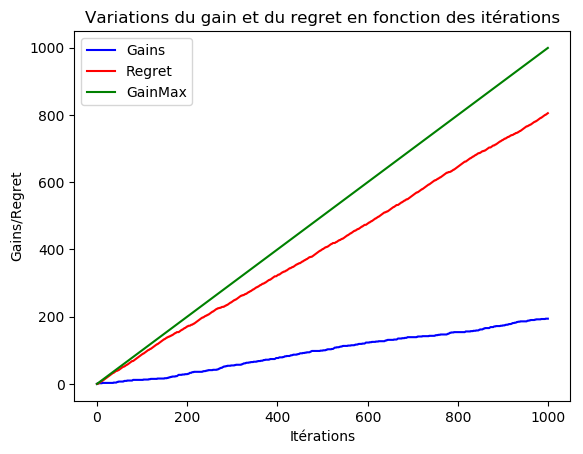

In [82]:

#test aleatoire
T= 1000
liste_mu1 = np.zeros(N)
Gain_parMachine1 = np.zeros(N)
regret1 = np.zeros(T)
Gain1 , GainMax1 = np.zeros(T), np.zeros(T)
liste_tirage1 = np.zeros(N)
for t in range(1, T):
    #choisir une action en fonction de l'info
    a = algo_aleatoire(liste_mu1, liste_tirage1)
    r = jouer(Levier, a)
    Gain1[t]  = Gain1[t-1] +r
    Gain_parMachine1[a]+=r
    liste_tirage1[a]+=1
    liste_mu1[a] =  Gain_parMachine1[a]/liste_tirage1[a]
    GainMax1[t] = np.amax(Levier)* t
    
    regret1[t] = GainMax1[t] - Gain1[t]
print(Gain1[T-1])
times = np.arange(0, T)
plt.rcdefaults()
plt.plot(times, Gain1, 'b', times, regret1 , 'r',times,  GainMax1, 'g')
plt.xlabel("Itérations")
plt.ylabel("Gains/Regret")
plt.title("Variations du gain et du regret en fonction des itérations")
plt.legend(["Gains","Regret","GainMax"])
plt.show()

916.0


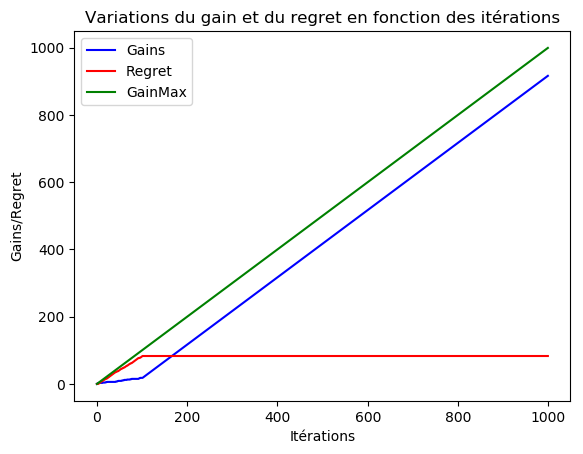

In [88]:
#test greedy
T= 1000
liste_mu2 = np.zeros(N)
Gain_parMachine2 = np.zeros(N)
regret2 = np.zeros(T)
Gain2 , GainMax2 = np.zeros(T), np.zeros(T)
liste_tirage2 = np.zeros(N)
nb=100
for t in range(1, T):
    #choisir une action en fonction de l'info
    a = algo_greedy(liste_mu2, liste_tirage2,nb)
    nb-=1
    r = jouer(Levier, a)
    Gain2[t]  = Gain2[t-1] +r
    Gain_parMachine2[a]+=r
    liste_tirage2[a]+=1
    liste_mu2[a] =  Gain_parMachine2[a]/liste_tirage2[a]
    GainMax2[t] = np.amax(Levier)* t
    
    regret2[t] = GainMax2[t] - Gain2[t]
print(Gain2[T-1])
times = np.arange(0, T)
plt.rcdefaults()
plt.plot(times, Gain2, 'b', times, regret2 , 'r',times,  GainMax2, 'g')
plt.xlabel("Itérations")
plt.ylabel("Gains/Regret")
plt.title("Variations du gain et du regret en fonction des itérations")
plt.legend(["Gains","Regret","GainMax"])
plt.show()

612.0


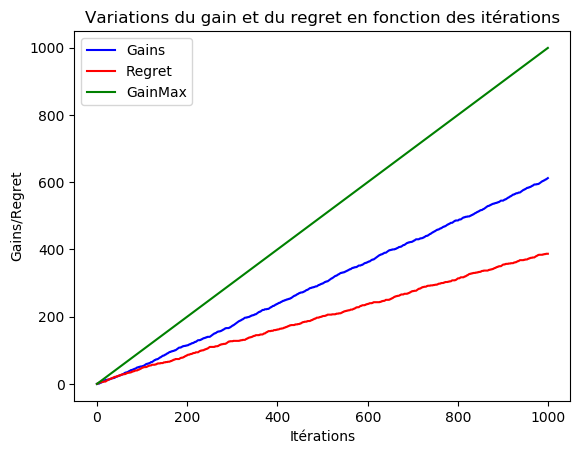

In [90]:
#test epsilone_greedy
T= 1000
liste_mu3 = np.zeros(N)
Gain_parMachine3 = np.zeros(N)
regret3 = np.zeros(T)
Gain3 , GainMax3 = np.zeros(T), np.zeros(T)
liste_tirage3 = np.zeros(N)
nb=5
for t in range(1, T):
    #choisir une action en fonction de l'info
    a = algo_epsilon_greedy(liste_mu3, liste_tirage3,0.01,nb)
    nb-=1
    r = jouer(Levier, a)
    Gain3[t]  = Gain3[t-1] +r
    Gain_parMachine3[a]+=r
    liste_tirage3[a]+=1
    liste_mu3[a] =  Gain_parMachine3[a]/liste_tirage3[a]
    GainMax3[t] = np.amax(Levier)* t
    
    regret3[t] = GainMax3[t] - Gain3[t]
print(Gain3[T-1])
times = np.arange(0, T)
plt.plot(times, Gain3, 'b', times, regret3 , 'r',times,  GainMax3, 'g')
plt.rcdefaults()
plt.xlabel("Itérations")
plt.ylabel("Gains/Regret")
plt.title("Variations du gain et du regret en fonction des itérations")
plt.legend(["Gains","Regret","GainMax"])
plt.show()

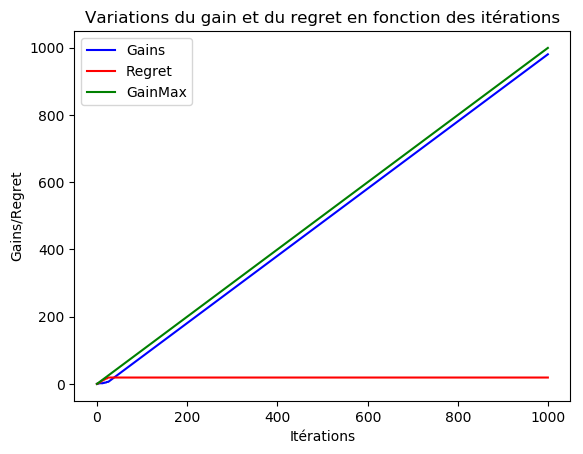

In [86]:
#test UCB
T= 1000
liste_mu4 = np.zeros(N)
Gain_parMachine4 = np.zeros(N)
regret4 = np.zeros(T)
Gain4 , GainMax4 = np.zeros(T), np.zeros(T)
liste_tirage4 = np.zeros(N)
#on joue tout les coups une fois pour initialisé les tableaux
for i in range(N):
    r = jouer(Levier, i)
    liste_tirage4[i]+=1
    Gain_parMachine4[i]+=r
    liste_mu4[i] =  Gain_parMachine4[i]/liste_tirage4[i]
for t in range(1, T):
    #choisir une action en fonction de l'info
    a = UCB(liste_mu4, liste_tirage4,t, 0.1)
    r = jouer(Levier, a)
    Gain4[t]  = Gain4[t-1] +r
    Gain_parMachine4[a]+=r
    liste_tirage4[a]+=1
    liste_mu4[a] =  Gain_parMachine4[a]/liste_tirage4[a]
    GainMax4[t] = np.amax(Levier)* t
    
    regret4[t] = GainMax4[t] - Gain4[t]

times = np.arange(0, T)
plt.plot(times, Gain4, 'b', times, regret4 , 'r',times,  GainMax4, 'g')
plt.rcdefaults()
plt.xlabel("Itérations")
plt.ylabel("Gains/Regret")
plt.title("Variations du gain et du regret en fonction des itérations")
plt.legend(["Gains","Regret","GainMax"])
plt.show()

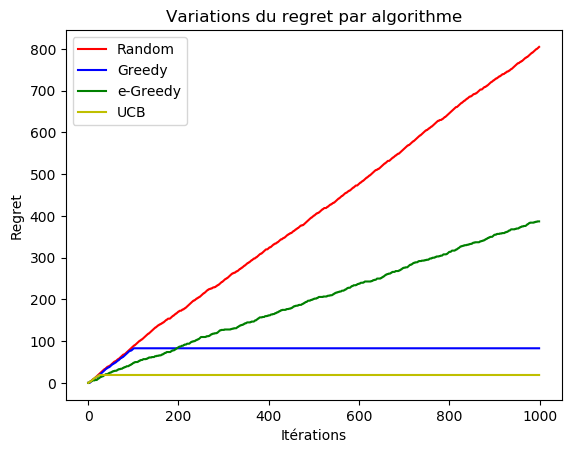

In [91]:
plt.plot(times,regret1,'r',times,regret2,'b',times,regret3,'g',times,regret4,'y')
plt.rcdefaults()
plt.xlabel("Itérations")
plt.ylabel("Regret")
plt.title("Variations du regret par algorithme")
plt.legend(["Random","Greedy","e-Greedy","UCB"])
plt.show()

In [72]:
T=1000
reg4N=[]
for i in range(1,301):
    Levier4 = np.random.rand(i)
    liste_mu4 = np.zeros(i)
    Gain_parMachine4 = np.zeros(i)
    regret4 = np.zeros(T)
    Gain4 , GainMax4 = np.zeros(T), np.zeros(T)
    liste_tirage4 = np.zeros(i)
    for s in range(i):
        r = jouer(Levier4, s)
        liste_tirage4[s]+=1
        Gain_parMachine4[s]+=r
        liste_mu4[s] =  Gain_parMachine4[s]/liste_tirage4[s]
    for t in range(1, T):
        #choisir une action en fonction de l'info
        a = UCB(liste_mu4, liste_tirage4,t, 1)
        r = jouer(Levier4, a)
        Gain4[t]  = Gain4[t-1] +r
        Gain_parMachine4[a]+=r
        liste_tirage4[a]+=1
        liste_mu4[a] =  Gain_parMachine4[a]/liste_tirage4[a]
        GainMax4[t] = np.amax(Levier)* t
    
        regret4[t] = GainMax4[t] - Gain4[t]
    reg4N.append(np.mean(regret4))

In [258]:
reg3N=[]
for i in range(1,301):
    Levier3 = np.random.rand(i)
    liste_mu3 = np.zeros(i)
    Gain_parMachine3 = np.zeros(i)
    regret3 = np.zeros(T)
    Gain3 , GainMax3 = np.zeros(T), np.zeros(T)
    liste_tirage3 = np.zeros(i)
    nb=20
    for t in range(1, T):
        #choisir une action en fonction de l'info
        a = algo_epsilon_greedy(liste_mu3, liste_tirage3,0.05,nb)
        nb-=1
        r = jouer(Levier3, a)
        Gain3[t]  = Gain3[t-1] +r
        Gain_parMachine3[a]+=r
        liste_tirage3[a]+=1
        liste_mu3[a] =  Gain_parMachine3[a]/liste_tirage3[a]
        GainMax3[t] = np.amax(Levier)* t
    
        regret3[t] = GainMax3[t] - Gain3[t]
    reg3N.append(np.mean(regret3))

In [259]:
reg2N=[]
for i in range(1,301):
    Levier2 = np.random.rand(i)
    liste_mu2 = np.zeros(i)
    Gain_parMachine2 = np.zeros(i)
    regret2 = np.zeros(T)
    Gain2 , GainMax2 = np.zeros(T), np.zeros(T)
    liste_tirage2 = np.zeros(i)
    nb=i
    for t in range(1, T):
        #choisir une action en fonction de l'info
        a = algo_greedy(liste_mu2, liste_tirage2,nb)
        nb-=1
        r = jouer(Levier2, a)
        Gain2[t]  = Gain2[t-1] +r
        Gain_parMachine2[a]+=r
        liste_tirage2[a]+=1
        liste_mu2[a] =  Gain_parMachine2[a]/liste_tirage2[a]
        GainMax2[t] = np.amax(Levier)* t
    
        regret2[t] = GainMax2[t] - Gain2[t]
    reg2N.append(np.mean(regret2))

In [260]:
reg1N=[]
for i in range(1,301):
    Levier1 = np.random.rand(i)
    liste_mu1 = np.zeros(i)
    Gain_parMachine1 = np.zeros(i)
    regret1 = np.zeros(T)
    Gain1 , GainMax1 = np.zeros(T), np.zeros(T)
    liste_tirage1 = np.zeros(i)
    for t in range(1, T):
        #choisir une action en fonction de l'info
       
        a = algo_aleatoire(liste_mu1, liste_tirage1)
        r = jouer(Levier1, a)
        Gain1[t]  = Gain1[t-1] +r
        Gain_parMachine1[a]+=r
        liste_tirage1[a]+=1
        liste_mu1[a] =  Gain_parMachine1[a]/liste_tirage1[a]
        GainMax1[t] = np.amax(Levier)* t
    
        regret1[t] = GainMax1[t] - Gain1[t]
    reg1N.append(np.mean(regret1))

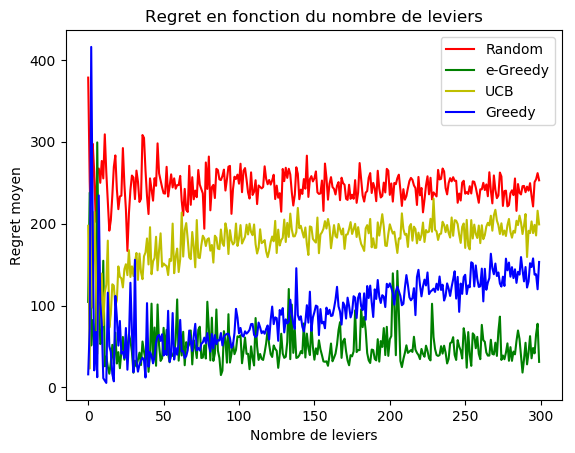

In [261]:
plt.plot(np.arange(300),reg1N,'r',np.arange(300),reg3N,'g',np.arange(300),reg4N,'y',np.arange(300), reg2N,'b')
plt.rcdefaults()
plt.xlabel("Nombre de leviers")
plt.ylabel("Regret moyen")
plt.title("Regret en fonction du nombre de leviers")
plt.legend(["Random","e-Greedy","UCB", "Greedy"])
plt.show()

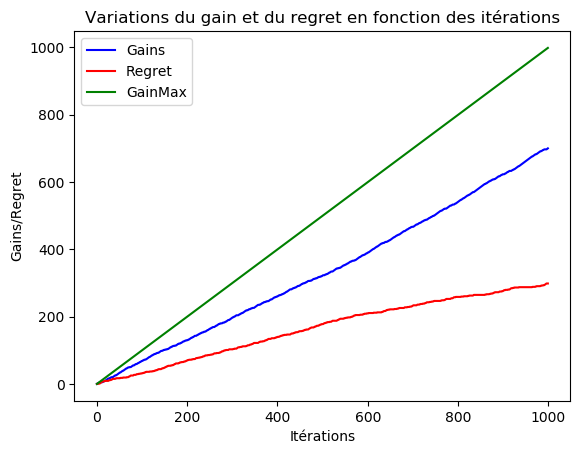

In [206]:
#test UCB
T= 1000
liste_mu4 = np.zeros(N)
Gain_parMachine4 = np.zeros(N)
regret4 = np.zeros(T)
Gain4 , GainMax4 = np.zeros(T), np.zeros(T)
liste_tirage4 = np.zeros(N)
#on joue tout les coups une fois pour initialisé les tableaux
for i in range(N):
    r = jouer(Levier, i)
    liste_tirage4[i]+=1
    Gain_parMachine4[i]+=r
    liste_mu4[i] =  Gain_parMachine4[i]/liste_tirage4[i]
for t in range(1, T):
    #choisir une action en fonction de l'info
    a = UCB(liste_mu4, liste_tirage4,t, 0.5)
    r = jouer(Levier, a)
    Gain4[t]  = Gain4[t-1] +r
    Gain_parMachine4[a]+=r
    liste_tirage4[a]+=1
    liste_mu4[a] =  Gain_parMachine4[a]/liste_tirage4[a]
    GainMax4[t] = np.amax(Levier)* t
    
    regret4[t] = GainMax4[t] - Gain4[t]

times = np.arange(0, T)
plt.plot(times, Gain4, 'b', times, regret4 , 'r',times,  GainMax4, 'g')
plt.rcdefaults()
plt.xlabel("Itérations")
plt.ylabel("Gains/Regret")
plt.title("Variations du gain et du regret en fonction des itérations")
plt.legend(["Gains","Regret","GainMax"])
plt.show()